In [1]:
import os,sys
import tensorflow as tf
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import time
from collections import Counter
hdir = '/home/selab/Desktop/SELab_sy/NMSC/NMSC_2018/'


/home/selab/anaconda3/envs/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/selab/anaconda3/envs/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def nearest(items,pivot):
    temp = min(items, key=lambda x: abs(x - pivot))
    return items.index(temp)

In [3]:
#kp to idx
kp2idx = {0.0:0, 0.3:1, 0.7:2, 1.0:3, 1.3:4, 1.7:5, 2.0:6, 2.3:7, 2.7:8, 3.0:9, 3.3:10, 3.7:11, 4.0:12, 4.3:13,
           4.7:14, 5.0:15, 5.3:16, 5.7:17, 6.0:18, 6.3:19, 6.7:20, 7.0:21, 7.3:22, 7.7:23, 8.0:24, 8.3:25, 8.7:26, 9.0:27}
#idx to kp
idx2kp = {0:0.0, 1:0.3, 2:0.7, 3:1.0, 4:1.3, 5:1.7, 6:2.0, 7:2.3, 8:2.7, 9:3.0, 10:3.3, 11:3.7, 12:4.0, 13:4.3,
           14:4.7, 15:5.0, 16:5.3, 17:5.7, 18:6.0, 19:6.3, 20:6.7, 21:7.0, 22:7.3, 23:7.7, 24:8.0, 25:8.3, 26:8.7, 27:9.0}    

max_idx_value = 27

In [4]:
#Kp index

data_kp = np.genfromtxt(hdir + 'KP_total.txt', names="year, month, day, hour, kp", dtype=(int, int, int, float,float))

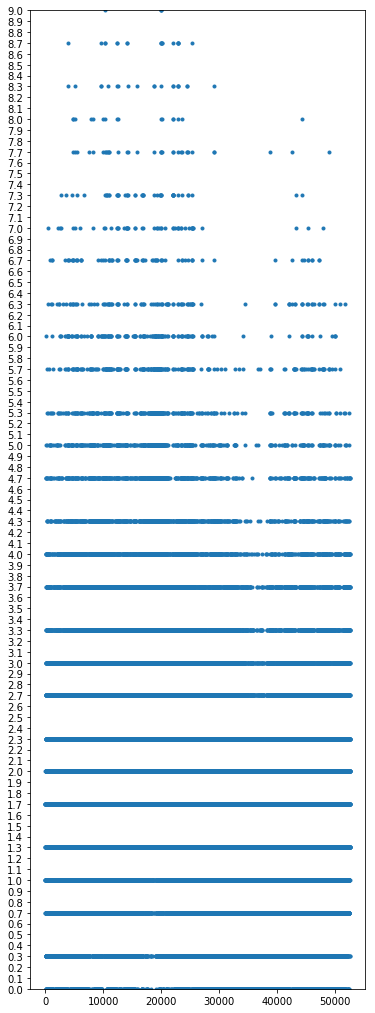

In [5]:
plt.figure(figsize=(6,18))
plt.plot(data_kp['kp'],'.')
plt.yticks(np.arange(0,12,0.1))
plt.ylim(0,9)
plt.show()
plt.close()

In [6]:
#kp index daily number check
#total 6574 days, each 8 values
kp_time = []
for i in range(len(data_kp["kp"])):
    kp_time.append(datetime.datetime(data_kp["year"][i],data_kp["month"][i],data_kp["day"][i],int(data_kp["hour"][i]),30))
    # 매시 30분?
kp_date = []
for i in range(len(data_kp["kp"])):
    kp_date.append(datetime.date(data_kp["year"][i],data_kp["month"][i],data_kp["day"][i]))

cnt = Counter(kp_date)

tdel = kp_date[-1]-kp_date[0]
n_data = []

for i in range(tdel.days+1):
    n_data.append(cnt[kp_date[0]+datetime.timedelta(i)])
    print('%s : %d' %(kp_date[0]+datetime.timedelta(i),cnt[kp_date[0]+datetime.timedelta(i)]))

check = Counter(n_data)
print(check)

print(len(data_kp["year"])/8 == tdel.days+1)


1997-01-01 : 8
1997-01-02 : 8
1997-01-03 : 8
1997-01-04 : 8
1997-01-05 : 8
1997-01-06 : 8
1997-01-07 : 8
1997-01-08 : 8
1997-01-09 : 8
1997-01-10 : 8
1997-01-11 : 8
1997-01-12 : 8
1997-01-13 : 8
1997-01-14 : 8
1997-01-15 : 8
1997-01-16 : 8
1997-01-17 : 8
1997-01-18 : 8
1997-01-19 : 8
1997-01-20 : 8
1997-01-21 : 8
1997-01-22 : 8
1997-01-23 : 8
1997-01-24 : 8
1997-01-25 : 8
1997-01-26 : 8
1997-01-27 : 8
1997-01-28 : 8
1997-01-29 : 8
1997-01-30 : 8
1997-01-31 : 8
1997-02-01 : 8
1997-02-02 : 8
1997-02-03 : 8
1997-02-04 : 8
1997-02-05 : 8
1997-02-06 : 8
1997-02-07 : 8
1997-02-08 : 8
1997-02-09 : 8
1997-02-10 : 8
1997-02-11 : 8
1997-02-12 : 8
1997-02-13 : 8
1997-02-14 : 8
1997-02-15 : 8
1997-02-16 : 8
1997-02-17 : 8
1997-02-18 : 8
1997-02-19 : 8
1997-02-20 : 8
1997-02-21 : 8
1997-02-22 : 8
1997-02-23 : 8
1997-02-24 : 8
1997-02-25 : 8
1997-02-26 : 8
1997-02-27 : 8
1997-02-28 : 8
1997-03-01 : 8
1997-03-02 : 8
1997-03-03 : 8
1997-03-04 : 8
1997-03-05 : 8
1997-03-06 : 8
1997-03-07 : 8
1997-03-08

2006-06-17 : 8
2006-06-18 : 8
2006-06-19 : 8
2006-06-20 : 8
2006-06-21 : 8
2006-06-22 : 8
2006-06-23 : 8
2006-06-24 : 8
2006-06-25 : 8
2006-06-26 : 8
2006-06-27 : 8
2006-06-28 : 8
2006-06-29 : 8
2006-06-30 : 8
2006-07-01 : 8
2006-07-02 : 8
2006-07-03 : 8
2006-07-04 : 8
2006-07-05 : 8
2006-07-06 : 8
2006-07-07 : 8
2006-07-08 : 8
2006-07-09 : 8
2006-07-10 : 8
2006-07-11 : 8
2006-07-12 : 8
2006-07-13 : 8
2006-07-14 : 8
2006-07-15 : 8
2006-07-16 : 8
2006-07-17 : 8
2006-07-18 : 8
2006-07-19 : 8
2006-07-20 : 8
2006-07-21 : 8
2006-07-22 : 8
2006-07-23 : 8
2006-07-24 : 8
2006-07-25 : 8
2006-07-26 : 8
2006-07-27 : 8
2006-07-28 : 8
2006-07-29 : 8
2006-07-30 : 8
2006-07-31 : 8
2006-08-01 : 8
2006-08-02 : 8
2006-08-03 : 8
2006-08-04 : 8
2006-08-05 : 8
2006-08-06 : 8
2006-08-07 : 8
2006-08-08 : 8
2006-08-09 : 8
2006-08-10 : 8
2006-08-11 : 8
2006-08-12 : 8
2006-08-13 : 8
2006-08-14 : 8
2006-08-15 : 8
2006-08-16 : 8
2006-08-17 : 8
2006-08-18 : 8
2006-08-19 : 8
2006-08-20 : 8
2006-08-21 : 8
2006-08-22

2013-04-20 : 8
2013-04-21 : 8
2013-04-22 : 8
2013-04-23 : 8
2013-04-24 : 8
2013-04-25 : 8
2013-04-26 : 8
2013-04-27 : 8
2013-04-28 : 8
2013-04-29 : 8
2013-04-30 : 8
2013-05-01 : 8
2013-05-02 : 8
2013-05-03 : 8
2013-05-04 : 8
2013-05-05 : 8
2013-05-06 : 8
2013-05-07 : 8
2013-05-08 : 8
2013-05-09 : 8
2013-05-10 : 8
2013-05-11 : 8
2013-05-12 : 8
2013-05-13 : 8
2013-05-14 : 8
2013-05-15 : 8
2013-05-16 : 8
2013-05-17 : 8
2013-05-18 : 8
2013-05-19 : 8
2013-05-20 : 8
2013-05-21 : 8
2013-05-22 : 8
2013-05-23 : 8
2013-05-24 : 8
2013-05-25 : 8
2013-05-26 : 8
2013-05-27 : 8
2013-05-28 : 8
2013-05-29 : 8
2013-05-30 : 8
2013-05-31 : 8
2013-06-01 : 8
2013-06-02 : 8
2013-06-03 : 8
2013-06-04 : 8
2013-06-05 : 8
2013-06-06 : 8
2013-06-07 : 8
2013-06-08 : 8
2013-06-09 : 8
2013-06-10 : 8
2013-06-11 : 8
2013-06-12 : 8
2013-06-13 : 8
2013-06-14 : 8
2013-06-15 : 8
2013-06-16 : 8
2013-06-17 : 8
2013-06-18 : 8
2013-06-19 : 8
2013-06-20 : 8
2013-06-21 : 8
2013-06-22 : 8
2013-06-23 : 8
2013-06-24 : 8
2013-06-25

In [7]:
#max kp extraction
#kp2idx 
kp_max = []
kp_max_date = []
kp_timeHist = []
for i in range(tdel.days + 1):
    j=8*i
    maxidx = np.argmax(data_kp["kp"][j:j+8])
    #kp_max.append(data_kp["kp"][j+maxidx])
    kp_max.append(kp2idx[data_kp["kp"][j+maxidx]])
    kp_max_date.append(kp_date[j+maxidx])
    temp = kp_time[j+maxidx].time()
    kp_timeHist.append(temp.hour)

([<matplotlib.axis.XTick at 0x7fce48cebdd8>,
 <a list of 8 Text xticklabel objects>)

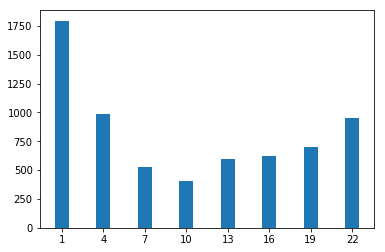

In [8]:
#kp observation time check
labels, values = zip(*Counter(kp_timeHist).items())

width = 1

plt.bar(labels, values, width)
plt.xticks(np.arange(1,25,3))

In [9]:
#CH
data_ch_reg = np.genfromtxt(hdir + 'CH_Regions_025scl2.dat', dtype=[('date', '<i8'), ('loc', '<U136')])

In [10]:
ch_time = []
ch_date = []
for i in range(len(data_ch_reg)):
    stamp = data_ch_reg["date"][i]
    ch_time.append(datetime.datetime(int(str(stamp)[0:4]),int(str(stamp)[4:6]),int(str(stamp)[6:8]),int(str(stamp)[8:10]),int(str(stamp)[10:12])))
    ch_date.append(datetime.date(int(str(stamp)[0:4]),int(str(stamp)[4:6]),int(str(stamp)[6:8])))

ch_date = list(set(ch_date))
ch_date.sort()

In [11]:
ch_reg = []

for i in range(len(ch_date)):
    nindx = nearest(ch_time,datetime.datetime.combine(ch_date[i],datetime.datetime.min.time()))
    ch_reg.append([data_ch_reg[nindx][0]]+[int(n) for n in data_ch_reg[nindx][1]])


In [23]:
len(ch_reg[10][1:])

136

In [47]:
test1 = 24
test2 = kp_max_date.index(ch_date[test1])
print(kp_max_date[test2])
print(ch_date[test1])


1997-04-27
1997-04-27


In [48]:
#CH와 일치하는 index만 뽑아서 ch 입력에 3일 kp 출력에 1일
dat_tot = []
for i in range(3,len(ch_date)):
    idx = kp_max_date.index(ch_date[i])
    dat_tot.append([ch_date[i],ch_reg[i-3][1:],ch_reg[i-2][1:],ch_reg[i-1][1:],kp_max[idx]])
    #dat_tot.append([ch_reg[i][1],kp_max[idx+1],kp_max[idx+2],kp_max[idx+3],kp_max[idx+4],kp_max[idx+5],kp_max[idx+6],kp_max[idx+7]])

In [62]:
len(dat_tot)

4297

In [80]:
l = int(len(dat_tot)/10*6)

In [86]:
print(l)
print(0,int(l))
print(int(l),int(l/6*8))
print(int(l/6*8),int(l/6*10))
print((3437-2578)/2578)
print((4296-3437)/2578)

2578
0 2578
2578 3437
3437 4296
0.33320403413498834
0.33320403413498834


In [203]:
'''
val = []
test = []
rest = []
i=0
while i < 4300-46:
    for j in range(16):
        train.append(dat_tot[i+j])
    i += 16
    
    for j in range(7):
        rest.append(dat_tot[i+j])
    i += 7
    
    for j in range(4):
        val.append(dat_tot[i+j])
    i += 4
    
    for j in range(7):
        rest.append(dat_tot[i+j])
    i += 7
    
    for j in range(5):
        test.append(dat_tot[i+j])
    i += 5
    
    for j in range(7):
        rest.append(dat_tot[i+j])
    i += 7
    
print(len(train),len(val),len(test),len(rest))
'''
div_tr = 4
div_va = 4
div_te = 2
div = int(len(dat_tot)/10*div_tr)

train = dat_tot[:int(div)]
val = dat_tot[int(div):int(div/div_tr*(div_tr+div_va))]
test = dat_tot[int(div/div_tr*(div_tr+div_va)):int(div/div_tr*(div_tr+div_va+div_te))]
print(len(train),len(val),len(test))

1718 1718 859


In [205]:
train_his = [item[4] for item in train]
val_his = [item[4] for item in val]
test_his = [item[4] for item in test]

labels_tot, values_tot = zip(*Counter(kp_max).items())
labels_tr, values_tr = zip(*Counter(train_his).items())
labels_va, values_va = zip(*Counter(val_his).items())
labels_te, values_te = zip(*Counter(test_his).items())

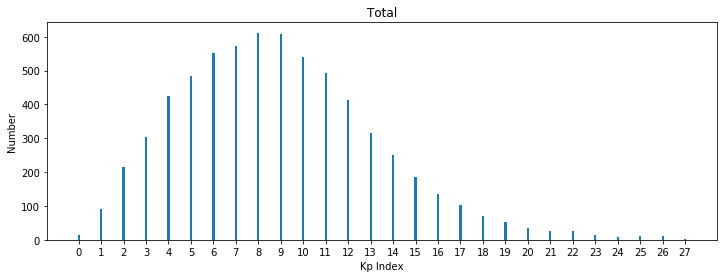

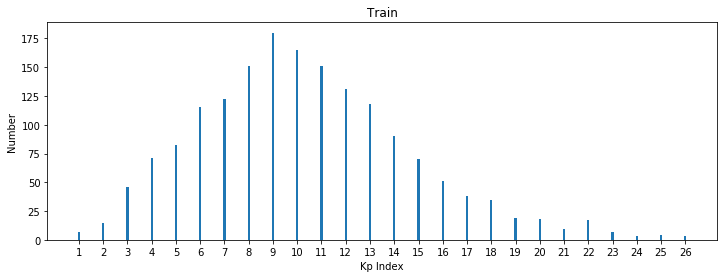

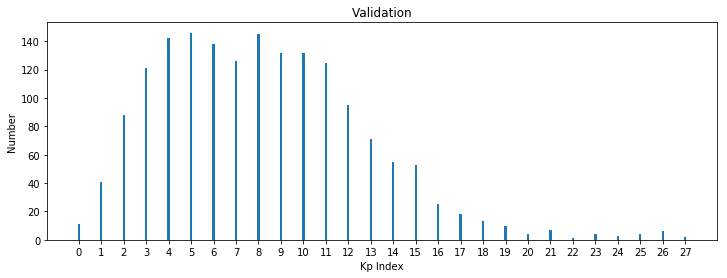

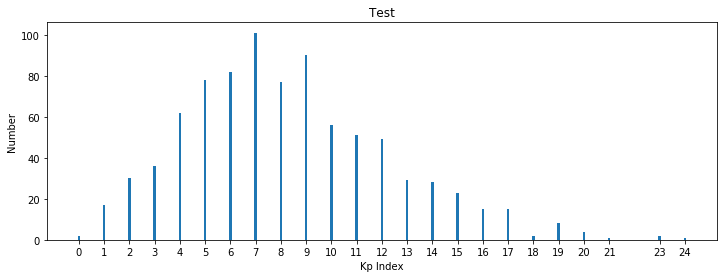

In [206]:
xs = list(labels_tot)
xs.sort() 
plt.figure(figsize=(12,4))
plt.bar(labels_tot,values_tot,width=0.1)
plt.xticks(xs)
plt.xlabel('Kp Index')
plt.ylabel('Number')
plt.title('Total')
plt.show()

xs = list(labels_tr)
xs.sort() 
plt.figure(figsize=(12,4))
plt.bar(labels_tr,values_tr,width=0.1)
plt.xticks(xs)
plt.xlabel('Kp Index')
plt.ylabel('Number')
plt.title('Train')
plt.show()

xs = list(labels_va)
xs.sort() 
plt.figure(figsize=(12,4))
plt.bar(labels_va,values_va,width=0.1)
plt.xticks(xs)
plt.xlabel('Kp Index')
plt.ylabel('Number')
plt.title('Validation')
plt.show()

xs = list(labels_te)
xs.sort() 
plt.figure(figsize=(12,4))
plt.bar(labels_te,values_te,width=0.1)
plt.xticks(xs)
plt.xlabel('Kp Index')
plt.ylabel('Number')
plt.title('Test')
plt.show()



In [214]:
#CH의 경우 입력값 정규화 하지 않음. [1,0]이기 때문
x_train = np.array([xi[1:4] for xi in train])
y_train = np.array([yi[4] for yi in train]) #라벨 정규화는 필요없음
#y_train = tf.keras.utils.to_categorical(y_train,28)

x_val =  np.array([xi[1:4] for xi in val])
y_val = np.array([yi[4] for yi in val])
#y_val = tf.keras.utils.to_categorical(y_val,28)

In [215]:
x_te = np.array([xi[1:4] for xi in test])
y_te = np.array([yi[4] for yi in test])
#y_te = tf.keras.utils.to_categorical(y_te,28)

In [195]:
# 3ch input 1 kp output
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(20, batch_input_shape = (1,3,136), stateful=True))
model.add(tf.keras.layers.Dense(28,activation='softmax'))

In [196]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (1, 20)                   12560     
_________________________________________________________________
dense_3 (Dense)              (1, 28)                   588       
Total params: 13,148
Trainable params: 13,148
Non-trainable params: 0
_________________________________________________________________
None


In [197]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy','mse'])

In [198]:
#Callback ft
class CustomHistory(tf.keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []        
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        

In [199]:
#Early stopper
def EarlyStop(history,patience):
    if len(history.val_loss)<=1 : 
        print('hislength')
        return patience
    
    nowloss = history.val_loss[-1]
    lastloss = history.val_loss[-2]
    if nowloss > lastloss :
        patience -= 1
    
    print('patience = '+str(patience))
    print('----------------------')
    return patience


In [200]:
num_epochs = 100
pat = 1
custom_hist = CustomHistory()
custom_hist.init()

In [201]:
model.fit(x_train,y_train,epochs=num_epochs,batch_size=1, verbose=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val,y_val))

Train on 2578 samples, validate on 859 samples
Epoch 1/100
2578/2578 [==============================] - 24s 9ms/step - loss: 2.9072 - acc: 0.0978 - mean_squared_error: 0.0334 - val_loss: 2.9021 - val_acc: 0.0664 - val_mean_squared_error: 0.0335
Epoch 2/100
2578/2578 [==============================] - 22s 9ms/step - loss: 2.8016 - acc: 0.1191 - mean_squared_error: 0.0331 - val_loss: 2.9458 - val_acc: 0.0710 - val_mean_squared_error: 0.0337
Epoch 3/100
2578/2578 [==============================] - 24s 9ms/step - loss: 2.7477 - acc: 0.1365 - mean_squared_error: 0.0329 - val_loss: 2.9593 - val_acc: 0.0675 - val_mean_squared_error: 0.0338
Epoch 4/100
2578/2578 [==============================] - 23s 9ms/step - loss: 2.6982 - acc: 0.1552 - mean_squared_error: 0.0326 - val_loss: 2.9634 - val_acc: 0.0745 - val_mean_squared_error: 0.0339
Epoch 5/100
2578/2578 [==============================] - 23s 9ms/step - loss: 2.6420 - acc: 0.1784 - mean_squared_error: 0.0324 - val_loss: 2.9276 - val_acc: 0.0

KeyboardInterrupt: 

In [124]:
#hmm..
#model.fit(x_train, y_train, epochs = num_epochs, batch_size = 1, verbose = 1, shuffle = False, callbacks=[custom_hist,early_stopping])

temp1 = [ np.where(r==1)[0][0] for r in y_te[:100]]
temp2 = x_te[0:100]
for epoch_idx in range(num_epochs):
    
    print('epochs : ' + str(epoch_idx))
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val,y_val))
    model.reset_states()
    
    temp = model.predict_classes(temp2, batch_size = 1)
    
    plt.figure(figsize=(18,6))
    plt.xlabel('Index',fontsize=12)
    plt.ylabel('Kp Label',fontsize=12)
    plt.title('epochs_'+str(epoch_idx),fontsize=15)
    plt.plot(temp1)
    plt.plot(temp)
    plt.savefig('epochs_'+str(epoch_idx)+'.png')
    plt.close()
    
    pat = EarlyStop(custom_hist,patience=pat)
    if pat <= 0: 
        print('Early stopped')
        break

epochs : 0
Train on 2578 samples, validate on 859 samples
Epoch 1/1
2578/2578 [==============================] - 44s 17ms/step - loss: 2.8782 - acc: 0.0950 - mean_squared_error: 0.0334 - val_loss: 3.3800 - val_acc: 0.0454 - val_mean_squared_error: 0.0354
hislength
epochs : 1
Train on 2578 samples, validate on 859 samples
Epoch 1/1
2578/2578 [==============================] - 30s 12ms/step - loss: 2.7627 - acc: 0.1218 - mean_squared_error: 0.0330 - val_loss: 3.2622 - val_acc: 0.0524 - val_mean_squared_error: 0.0350
patience = 1
----------------------
epochs : 2
Train on 2578 samples, validate on 859 samples
Epoch 1/1
2578/2578 [==============================] - 28s 11ms/step - loss: 2.6727 - acc: 0.1509 - mean_squared_error: 0.0325 - val_loss: 3.1538 - val_acc: 0.0780 - val_mean_squared_error: 0.0347
patience = 1
----------------------
epochs : 3
Train on 2578 samples, validate on 859 samples
Epoch 1/1
2578/2578 [==============================] - 27s 11ms/step - loss: 2.5330 - acc: 0.19

In [860]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [502]:
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=0)
#hist = model.fit(x_train, y_train, epochs = num_epochs, batch_size = 1, verbose = 2, shuffle = False, callbacks=[early_stopping],validation_data=(x_val,y_val))

Train on 4000 samples, validate on 1280 samples
Epoch 1/150
 - 53s - loss: 2.8700 - acc: 0.0943 - val_loss: 2.7427 - val_acc: 0.1125
Epoch 2/150
 - 49s - loss: 2.8332 - acc: 0.0940 - val_loss: 2.7207 - val_acc: 0.1125
Epoch 3/150
 - 50s - loss: 2.7920 - acc: 0.1040 - val_loss: 2.6503 - val_acc: 0.1219
Epoch 4/150
 - 51s - loss: 2.7294 - acc: 0.1115 - val_loss: 2.5945 - val_acc: 0.1359
Epoch 5/150
 - 50s - loss: 2.6967 - acc: 0.1120 - val_loss: 2.5773 - val_acc: 0.1344
Epoch 6/150
 - 50s - loss: 2.6848 - acc: 0.1185 - val_loss: 2.5753 - val_acc: 0.1313
Epoch 7/150
 - 50s - loss: 2.6782 - acc: 0.1220 - val_loss: 2.5772 - val_acc: 0.1313


In [138]:
model.save('/home/selab/Desktop/SELab_sy/NMSC/RNN/lstm_ch31/ch31.h5')

In [828]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


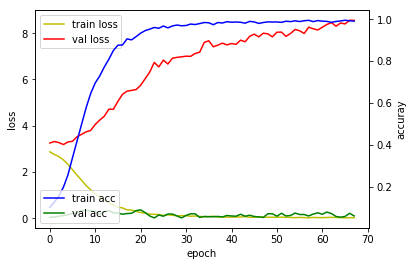

In [137]:
%matplotlib inline

loss_ax = plt.subplot()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label='train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label='val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label='train acc')
acc_ax.plot(custom_hist.val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.savefig('/home/selab/Desktop/SELab_sy/NMSC/RNN/lstm_ch31/ch31.png')
plt.show()
plt.close()

In [139]:
x_te = np.array([xi[1:4] for xi in test])
y_te = np.array([yi[4] for yi in test])
y_te = tf.keras.utils.to_categorical(y_te,28)

In [140]:
scores = model.evaluate(x_te,y_te,batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

859/859 [==============================] - 2s 3ms/step
acc: 7.92%


In [216]:
print(model.metrics_names)

['loss', 'acc', 'mean_squared_error']


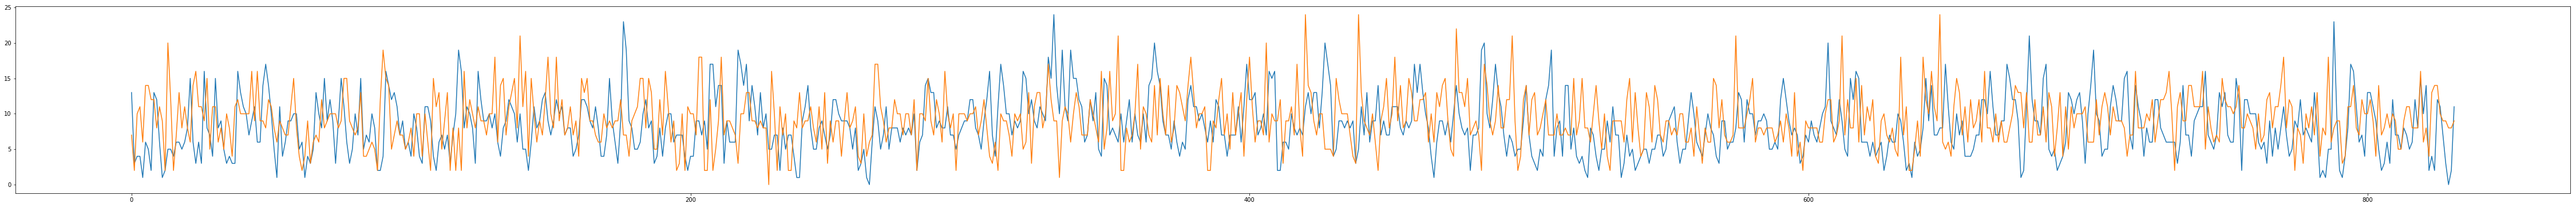

In [177]:
yhat = model.predict_classes(x_te[:32*(len(x_te)//32)])
temp = [np.where(y == 1)[0][0] for y in y_te[:32*(len(x_te)//32)]]
plt.figure(figsize=(80,6))
plt.plot(temp,'-')
plt.plot(yhat,'-',alpha=1)
plt.savefig('temp.png',dip=300)

In [159]:
scores = model.evaluate(x_train,y_train,batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2578/2578 [==============================] - 8s 3ms/step
acc: 99.57%


In [202]:
yhat_tr = model.predict_classes(x_train)
temp = [np.where(y == 1)[0][0] for y in y_train]
plt.figure(figsize=(240,6))
plt.plot(temp,'-')
plt.plot(yhat_tr,'-',alpha=1)
plt.savefig('temp2.png',dip=300)

InvalidArgumentError: Incompatible shapes: [18,20] vs. [32,20]
	 [[Node: lstm_3/while/add_3 = Add[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](lstm_3/while/BiasAdd_1, lstm_3/while/MatMul_5)]]

In [183]:
count = 0
for i in range(len(temp)):
    if temp[i] == yhat_tr[i]: count +=1


In [185]:
count/len(temp)

0.623046875

In [858]:
#제대로된 상관관계

y_te_la = np.asarray(temp)
sigref = np.std(y_te_la)
avgref = np.mean(y_te_la)

sigpre = np.std(yhat)
avgpre = np.mean(yhat)

corr = np.sum((y_te_la - avgref)*(yhat-avgpre))/sigref/sigpre/float(len(y_te_la))
print(corr)

#예측 효율 
mse_target = np.sum((y_te_la-yhat)**2)/len(y_te_la)
mse_ref = np.sum((y_te_la-avgref)**2)/len(yhat)
SS = 1-mse_target/mse_ref
print(SS)

0.4077901035726027
-0.031302286858578166


In [75]:
x_train[0].shape

(7, 1)

In [106]:
res = model2.get_weights()

list

In [101]:
len(res)

5

In [113]:
for i in range(5):
    print(len(res[i]))
    


1
256
1024
256
28


In [123]:
res[0]

array([[ 0.03289833, -0.03692361,  0.02495029, ...,  0.05121665,
         0.03796408,  0.01747319]], dtype=float32)